<a href="https://colab.research.google.com/github/Tushar0852/AMD_PREDICTION/blob/main/AMD_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import os


In [ ]:
train_dir = '/content/drive/MyDrive/SPILTTED_DATASET/train'
val_dir = '/content/drive/MyDrive/SPILTTED_DATASET/val'
test_dir = '/content/drive/MyDrive/SPILTTED_DATASET/test'


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    width_shift_range=0.1,
    height_shift_range=0.1
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 1244 images belonging to 2 classes.
Found 156 images belonging to 2 classes.
Found 156 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.5009 - loss: 0.8198 - val_accuracy: 0.5000 - val_loss: 0.8103 - learning_rate: 1.0000e-04
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 37s 940ms/step - accuracy: 0.5055 - loss: 0.8117 - val_accuracy: 0.7949 - val_loss: 0.8014 - learning_rate: 1.0000e-04
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 37s 957ms/step - accuracy: 0.5926 - loss: 0.8015 - val_accuracy: 0.4936 - val_loss: 0.7899 - learning_rate: 1.0000e-04
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 37s 966ms/step - accuracy: 0.5851 - loss: 0.7900 - val_accuracy: 0.7756 - val_loss: 0.7677 - learning_rate: 1.0000e-04
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 35s 909ms/step - accuracy: 0.6435 - loss: 0.7742 - val_accuracy: 0.8333 - val_loss: 0.7379 - learning_rate: 1.0000e-04
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 37s 942ms/step - accuracy: 0.6636 - loss: 0.7522 - val_accuracy: 0.8077 - val_loss: 0.6947 - learning_rate: 1.0000e-04
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 37s 943ms/step - accur

In [ ]:
model.save('amd_classifier_model.keras')


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")



5/5 ━━━━━━━━━━━━━━━━━━━━ 35s 9s/step - accuracy: 0.8461 - loss: 0.3941
Test Accuracy: 0.8846


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [ ]:
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.round(y_pred_probs).astype(int).flatten()  # Convert to binary (0 or 1)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 454ms/step


In [ ]:
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))
print("AUC Score:", roc_auc_score(y_true, y_pred_probs))


Accuracy: 0.8846153846153846
Precision: 0.8409090909090909
Recall: 0.9487179487179487
F1 Score: 0.891566265060241
AUC Score: 0.9669625246548323


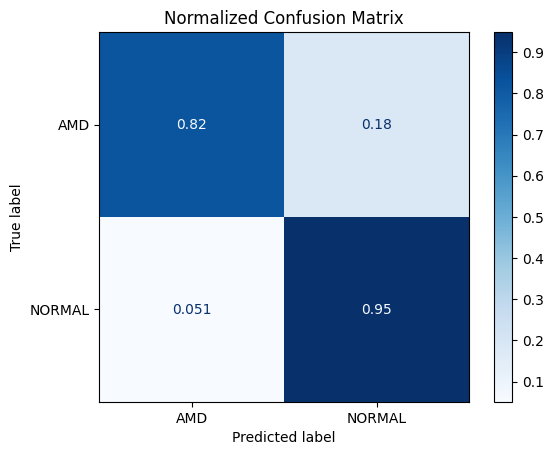

In [ ]:
cm = confusion_matrix(y_true, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix")
plt.show()


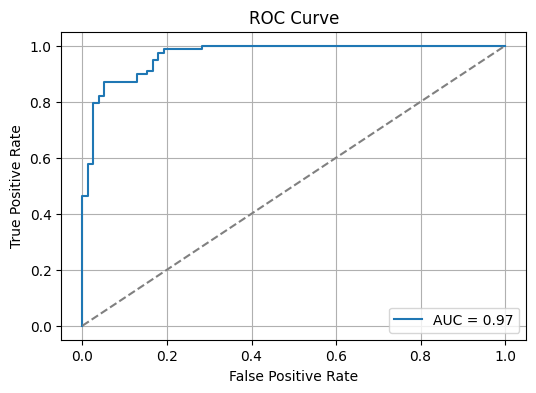

In [ ]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc_score(y_true, y_pred_probs)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()
